In [1]:
import psycopg2
import numpy as np
import pandas as pd
import datetime as dt
import cx_Oracle
import csv

#### SQL Reviews

In [2]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query('''
SELECT * FROM 
(
SELECT 
RATINGEVENTOBJECTTARGETID,
s.DT,
s.RATINGEVENTOBJECTSCORE,
REPLACE(s.REVIEWNAME, '?', 'n') AS REVIEWNAME,
REPLACE(s.REVIEWVALUE, '?', 'n') AS REVIEWVALUE
FROM DWHPRO.COMPANY_REVIEW s
)t 
pivot (
min(REVIEWVALUE) value FOR REVIEWNAME IN ('title', 'description')
)
''', con)
review = df
df_save = df
review.head()

con.close()

11.2.0.3.0


In [3]:
review.head()

,RATINGEVENTOBJECTTARGETID,DT,RATINGEVENTOBJECTSCORE,'title'_VALUE,'description'_VALUE
0,34191594985,2019-01-13,4,.,.
1,27203188658,2018-09-04,5,Se puede hablar sin ningun problemas con ellos.,"Mi valoracion es muy buena,Tanto como persona ..."
2,34197307040,2019-07-17,5,10,10
3,23212224558,2019-07-17,3,Buen trabajo pero la empresa pone demasiadas t...,"Es un trabajo bastante comodo, pero a la hora ..."
4,34196877334,2019-08-29,4,"Buen ambiente de trabajo, buen sueldo y la rel...","Buen ambiente de trabajo, buen sueldo y la rel..."


In [4]:
review.shape

(1636201, 5)

In [5]:
review = review.rename(index=str, 
                       columns=
                       {"RATINGEVENTOBJECTTARGETID": "EXPERIENCE_ID"
                       ,"'title'_VALUE": "TITLE"
                       ,"DT": "DATE_REVIEW" 
                       ,"'description'_VALUE": "DESCRIPTION"
                       ,"RATINGEVENTOBJECTSCORE": "SCORE"}
                      )
review.head()

,EXPERIENCE_ID,DATE_REVIEW,SCORE,TITLE,DESCRIPTION
0,34191594985,2019-01-13,4,.,.
1,27203188658,2018-09-04,5,Se puede hablar sin ningun problemas con ellos.,"Mi valoracion es muy buena,Tanto como persona ..."
2,34197307040,2019-07-17,5,10,10
3,23212224558,2019-07-17,3,Buen trabajo pero la empresa pone demasiadas t...,"Es un trabajo bastante comodo, pero a la hora ..."
4,34196877334,2019-08-29,4,"Buen ambiente de trabajo, buen sueldo y la rel...","Buen ambiente de trabajo, buen sueldo y la rel..."


In [6]:
review.to_csv('reviews_all_data.csv', index= False)
#, sep=';')

#### Load csv

In [5]:
#Load the data 
df_csv = pd.read_csv('reviews_all_data.csv')#, encoding='latin-1', sep='|', header=None)

In [6]:
df_csv.head()

,EXPERIENCE_ID,DATE_REVIEW,SCORE,TITLE,DESCRIPTION
0,34121772802,2018-09-08,2,:),NaN
1,33824903220,2018-09-08,5,muy bien y contento,muy bien y contento
2,34120310630,2018-09-08,5,TEAM BUILDING,NaN
3,34121040078,2018-09-08,5,Formacion profesional de gran valor,NaN
4,34120994936,2018-09-08,5,Buen trato con los trabajadores.,NaN


In [7]:
review = df_csv

### Experiencias Company Norm desde BBDD

In [ ]:
#Lista para filtrar en SQL   #= ('Dentix', 'Vivanta') #tuples object para empresas
lista_empresas =(
'KPMG'
,'PwC'
,'EY'
,'Deloitte'
,'Banco Santander'
,'BBVA'
,'Bankinter'
,'ING Direct'
,'ING Nationale-Nederlanden'
,'Repsol'
,'Repsol YPF'
,'Sopra Steria'
,'Sopra Group'
,'Atos Global Delivery Center Canarias'
,'Atos'
,'Capgemini'
,'Sogeti'
)

In [ ]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query
sql = '''
SELECT 
ID_EXPERIENCIA
,DESC_EXPERIENCIA_NORMALIZADO
FROM DWHPRO.EXPERIENCIAS_COMPANY_NORM
WHERE 1=1
--AND CREATED_AT >= TO_DATE('2019-01-01','YYYY-mm-dd')
AND NORMALIZATION_MODEL IS NOT NULL
AND SCORE > 0.7
AND DESC_EXPERIENCIA_NORMALIZADO in {}'''.format(lista_empresas)

df = pd.read_sql_query(sql,con)

exp_df = df
df_save = df


con.close()

In [7]:
#TODAS LAS EXP NORMALIZADAS
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query
sql = '''
SELECT 
ID_EXPERIENCIA as EXPERIENCE_ID
,ID_EXPERIENCIA_NORM
,DESC_EXPERIENCIA_NORMALIZADO
FROM DWHPRO.EXPERIENCIAS_COMPANY_NORM
WHERE 1=1
AND NORMALIZATION_MODEL IS NOT NULL
AND SCORE = 1
'''

df = pd.read_sql_query(sql,con)

exp_df = df
df_save = df

con.close()

11.2.0.3.0


#### To csv

In [8]:
exp_df.to_csv('exp_comp_norm_all_data.csv', index= False)
#, sep=';')

#### Read csv

In [8]:
#Load the data 
df_csv = pd.read_csv('exp_comp_norm_all_data.csv')#, encoding='latin-1', sep='|', header=None)

In [9]:
exp_df = df_csv

In [9]:
review.head()

,EXPERIENCE_ID,DATE_REVIEW,SCORE,TITLE,DESCRIPTION
0,34191594985,2019-01-13,4,.,.
1,27203188658,2018-09-04,5,Se puede hablar sin ningun problemas con ellos.,"Mi valoracion es muy buena,Tanto como persona ..."
2,34197307040,2019-07-17,5,10,10
3,23212224558,2019-07-17,3,Buen trabajo pero la empresa pone demasiadas t...,"Es un trabajo bastante comodo, pero a la hora ..."
4,34196877334,2019-08-29,4,"Buen ambiente de trabajo, buen sueldo y la rel...","Buen ambiente de trabajo, buen sueldo y la rel..."


In [10]:
exp_df.shape

(8777485, 3)

In [11]:
exp_df.head()

,EXPERIENCE_ID,ID_EXPERIENCIA_NORM,DESC_EXPERIENCIA_NORMALIZADO
0,195920240,1731,Eurest
1,195922906,4270,CUTASA
2,195923019,2385,Sol Melia
3,195928229,1554,SEAT
4,195931051,1975,Aegon Seguros


### ahora cantidad de reviews con empresas norm al 100%

In [12]:
#revie con empresa norm
reviews_norm = review.merge(exp_df,how='inner',on = 'EXPERIENCE_ID')

In [14]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query
sql ='''
SELECT 
DESC_OFERTA_NORMALIZADO as DESC_EXPERIENCIA_NORMALIZADO
FROM DWHPRO.OFERTAS_COMPANY_NORM
WHERE 1=1
AND NORMALIZATION_MODEL IS NOT NULL
--AND SCORE >= 0.8
AND SCORE = 1
AND ID_PUESTO_NORM <> '-1'
group by 
DESC_OFERTA_NORMALIZADO
'''

df = pd.read_sql_query(sql,con)

perfil_norm = df

con.close()

11.2.0.3.0


In [17]:
perfil_norm.shape

(4109, 1)

In [18]:
empresas_norm = reviews_norm.merge(perfil_norm,how='inner',on = 'DESC_EXPERIENCIA_NORMALIZADO')

In [19]:
empresas_norm.shape #aca se ven las reviews restantes entre los dos cruces al 100%

(207439, 7)

In [20]:
grouped_explo = empresas_norm.groupby(['DESC_EXPERIENCIA_NORMALIZADO'])

# count the unique users, orders, and total revenue per Group + Period
metrics_explo = grouped_explo.agg({'EXPERIENCE_ID': np.count_nonzero
                      })

# make the column names more meaningful
metrics_explo.rename(columns={'EXPERIENCE_ID': 'Reviews'}, inplace=True)
metrics_explo.head(20)

,Reviews
DESC_EXPERIENCIA_NORMALIZADO,
100 Montaditos,557
20 Minutos,22
360 Talent,6
3ASIDE Consultors,1
40 Grados a la Sombra,5
4set TALENT & TECHNOLOGY,4
7 i TRIA,46
A Loja do Gato Preto,59
A&P Formacion,2


In [21]:
metrics_explo = metrics_explo.reset_index()

In [22]:
metrics_explo.to_csv('metrics_explo.csv', index= False)
#, sep=';')

#### agregar un join con perfiles normalizados (ofertas normalizadas)

In [23]:
empresas_norm = metrics_explo.merge(perfil_norm,how='inner',on = 'DESC_EXPERIENCIA_NORMALIZADO')

In [24]:
empresas_norm.head()

,DESC_EXPERIENCIA_NORMALIZADO,Reviews
0,100 Montaditos,557
1,20 Minutos,22
2,360 Talent,6
3,3ASIDE Consultors,1
4,40 Grados a la Sombra,5


#### df type

In [25]:
exp_df = exp_df.rename(index=str, 
                             columns={"ID_EXPERIENCIA": "EXPERIENCE_ID"
                                     ,"DESC_EXPERIENCIA_NORMALIZADO": "EMPRESA"})

In [26]:
full_df_review = exp_df.merge(review,how='inner',on = 'EXPERIENCE_ID')

In [27]:
full_df_review[["TITLE", "DESCRIPTION"]] = full_df_review[["TITLE", "DESCRIPTION"]].astype(str) 

In [28]:
from datetime import datetime

In [29]:
full_df_review[["DATE_REVIEW"]] = full_df_review[["DATE_REVIEW"]].astype(datetime)

In [30]:
#quitar ultimos caracteres extraños manualmente
full_df_review["TITLE"] = full_df_review["TITLE"].apply(lambda x: 
x.replace("!", "").replace("?", "n").replace("Enter", "").replace("enter", "")
.replace("#", "")
)

In [31]:
#quitar ultimos caracteres extraños manualmente
full_df_review["DESCRIPTION"] = full_df_review["DESCRIPTION"].apply(lambda x: 
x.replace("!", "").replace("?", "n").replace("Enter", "").replace("enter", "")
.replace("#", "")
)

In [20]:
#From csv
full_df_review['MONTH_ID'] = full_df_review['DATE_REVIEW'].str[:7]

In [32]:
#From SQL
full_df_review['MONTH_ID'] = full_df_review['DATE_REVIEW'].apply(lambda x: x.strftime('%Y-%m'))

In [33]:
full_df_review.head()

,EXPERIENCE_ID,ID_EXPERIENCIA_NORM,EMPRESA,DATE_REVIEW,SCORE,TITLE,DESCRIPTION,MONTH_ID
0,1250997994,4622,Bull Espa?a,2019-01-27 00:00:00,3,Empresa con poca fiabilidad laboral,Siempre sembrando rumores de despidos masivos....,2019-01
1,1311597744,620,"Toys ""R"" Us",2019-02-05 00:00:00,0,Responsable y comprometida,Toysrus es una buena empresa para trabajar. He...,2019-02
2,1371683156,747,Unicaja Banco,2019-10-16 00:00:00,5,Entidad financiera con gran trayectoria,La entidad dispone de una gran cartera de clie...,2019-10
3,1372350064,627,Jazztel,2019-10-24 00:00:00,4,bien,bien.,2019-10
4,814034074,-1,autonomo,2019-11-20 00:00:00,3,bueno,bueno,2019-11


In [34]:
full_df_review.shape

(375838, 8)

In [35]:
grouped = full_df_review.groupby(['MONTH_ID'])

# count the unique users, orders, and total revenue per Group + Period
metrics = grouped.agg({'ID_EXPERIENCIA_NORM': pd.Series.nunique
                      })

# make the column names more meaningful
metrics.rename(columns={'ID_EXPERIENCIA_NORM': 'Experiencias_normalizadas'}, inplace=True)
metrics.head(20)

,Experiencias_normalizadas
MONTH_ID,
2018-09,497
2018-10,643
2018-11,602
2018-12,435
2019-01,3205
2019-02,3382
2019-03,3626
2019-04,3477
2019-05,3817


### Plot V1

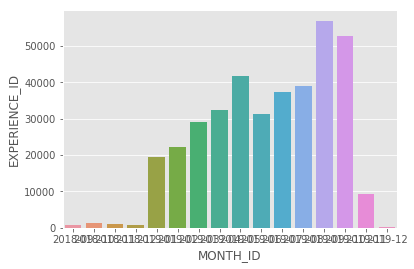

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df=full_df_review

groupedvalues=df.groupby(['MONTH_ID']).count().reset_index()
g=sns.barplot(x='MONTH_ID',y='EXPERIENCE_ID',data=groupedvalues)

#v2:
#groupedvalues=df.groupby(['MONTH_ID']).count()['EXPERIENCE_ID']#.unstack().plot(kind='bar', stacked=True)
#groupedvalues.unstack(level=[1]).plot(kind='bar')

# Plot formatting

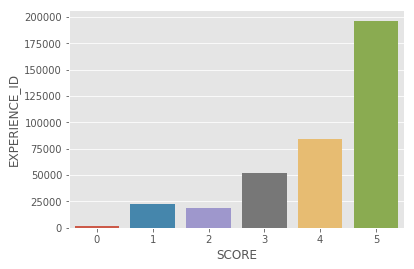

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df=full_df_review

groupedvalues=df.groupby(['SCORE']).count().reset_index()
g=sns.barplot(x='SCORE',y='EXPERIENCE_ID',data=groupedvalues)

#v2:
#groupedvalues=df.groupby(['MONTH_ID']).count()['EXPERIENCE_ID']#.unstack().plot(kind='bar', stacked=True)
#groupedvalues.unstack(level=[1]).plot(kind='bar')

# Plot formatting

### Export new csv

In [38]:
full_df_review.to_csv('reviews_merge_all.csv', index= False)
#, sep=';')

### Agrupar data por empresa

In [39]:

grouped2 = full_df_review.groupby(['EMPRESA'])

# count the unique users, orders, and total revenue per Group + Period
metrics2 = grouped2.agg({'SCORE': [pd.Series.mean, pd.Series.median, pd.Series.std],
                       'EXPERIENCE_ID': np.count_nonzero
                      })

# make the column names more meaningful
metrics2.rename(columns={'SCORE': 'Rating',
                        'EXPERIENCE_ID': 'Reviews'}, inplace=True)
metrics2.head(20)

Rating                   \
                                               mean median       std   
EMPRESA                                                                
 Campamentos y Actividades Educativas      4.608696    5.0  0.682423   
 Universitat de Lleida                     4.208333    5.0  1.215092   
100 Montaditos                             3.721724    4.0  1.339673   
13 TV                                      3.500000    4.0  1.000000   
20 Minutos                                 4.045455    5.0  1.526817   
360 Talent                                 3.833333    4.5  1.602082   
3ASIDE Consultors                          5.000000    5.0       NaN   
40 Grados a la Sombra                      2.800000    3.0  1.788854   
40Grados                                   3.437500    3.5  1.547848   
4set TALENT & TECHNOLOGY                   5.000000    5.0  0.000000   
7 i TRIA                                   4.065217    4.0  1.019851   
A Loja do Gato Preto                       3.915254    4.0  1.149035   
A&P Formacion                              5.000000    5.0  0.000000   
A+A Imagen y Comunicacion                  3.500000    3.5  2.121320   
AB Mauri Food                              3.833333    4.0  0.983192   
ABAST                                      4.250000    5.0  1.388730   
ABB                                        4.489130    5.0  0.931672   
ABC                                        3.895522    4.0  1.327270   
ABD Associacio Benestar i Desenvolupament  4.440000    5.0  0.820569   
ABDE Business Consulting                   5.000000    5.0       NaN   

                                                Reviews  
                                          count_nonzero  
EMPRESA                                                  
 Campamentos y Actividades Educativas                46  
 Universitat de Lleida                               24  
100 Montaditos                                      557  
13 TV                                                 4  
20 Minutos                                           22  
360 Talent                                            6  
3ASIDE Consultors                                     1  
40 Grados a la Sombra                                 5  
40Grados                                             16  
4set TALENT & TECHNOLOGY                              4  
7 i TRIA                                             46  
A Loja do Gato Preto                                 59  
A&P Formacion                                         2  
A+A Imagen y Comunicacion                             2  
AB Mauri Food                                         6  
ABAST                                                 8  
ABB                                                  92  
ABC                                                  67  
ABD Associacio Benestar i Desenvolupament            25  
ABDE Business Consulting                              1

In [40]:
metrics2 = metrics2.round(1)

In [41]:
metrics2.head()

Rating                   Reviews
                                        mean median  std count_nonzero
EMPRESA                                                               
 Campamentos y Actividades Educativas    4.6    5.0  0.7            46
 Universitat de Lleida                   4.2    5.0  1.2            24
100 Montaditos                           3.7    4.0  1.3           557
13 TV                                    3.5    4.0  1.0             4
20 Minutos                               4.0    5.0  1.5            22

### Exporte Final Files

In [42]:
metrics2.to_csv('company_metrics_all.csv', index= True)
#, sep=';')